<a href="https://colab.research.google.com/github/Raudhil/Machine-Learning-2025/blob/main/Jobsheet%207/TG7_2341720164_RAUDHIL_FIRDAUS_NAUFAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

**Tugas 1: Multiple Linear Regression**

In [87]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# baca data dari file CSV
data = '/content/drive/MyDrive/insurance.csv'
df = pd.read_csv(data)

In [89]:
# melihat beberapa data awal
df.head()

# mengecek ukuran data
df.shape

# informasi tentang data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


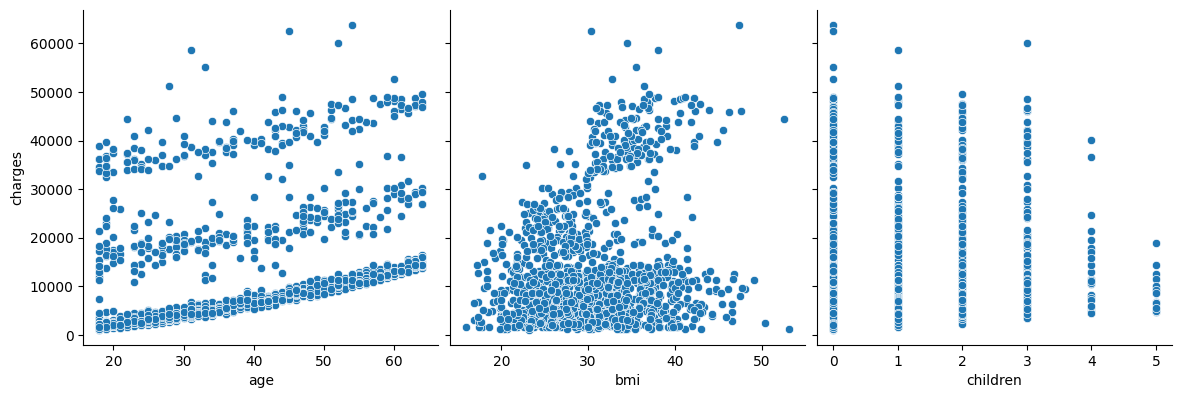

In [91]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

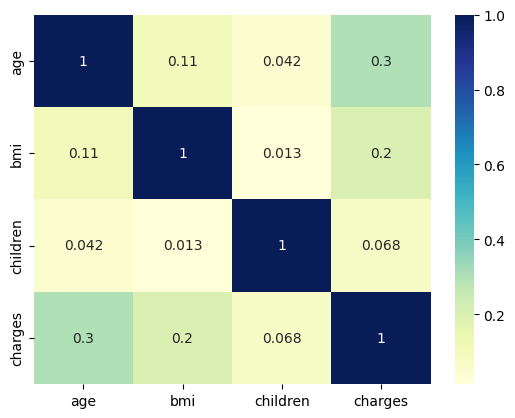

In [92]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [93]:


X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

Dataset yang digunakan adalah insurance.csv yang isinya data mengenai biaya medis personal.

Variabel:
- age: usia penerima manfaat
- sex: jenis kelamin (male/female)
- bmi: indeks massa tubuh
- children: jumlah anak/tanggungan
- smoker: status perokok (yes/no)
- region: wilayah tempat tinggal (northeast, southeast, southwest, northwest)

Variabel target adalah 'charges', yaitu biaya medis personal yang dikeluarkan.

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.



3. Lakukan feature scaling jika diperlukan.


In [94]:
X_encoded = pd.get_dummies(X, drop_first=True).astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, train_size=0.7, test_size=0.3, random_state=100
)


In [95]:
numerical_cols = ['age', 'bmi', 'children']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data latih setelah penskalaan:")
print(X_train.head())
print("\nData uji setelah penskalaan:")
print(X_test.head())

Data latih setelah penskalaan:
           age       bmi  children  sex_male  smoker_yes  region_northwest  \
966   0.847399 -1.010333  0.744470         1           1                 1   
522   0.847399  0.434176 -0.914635         0           0                 0   
155   0.349938  1.397181 -0.914635         1           0                 1   
671  -0.716049  0.113174 -0.914635         0           0                 0   
1173 -0.076457 -0.207828  0.744470         1           0                 1   

      region_southeast  region_southwest  
966                  0                 0  
522                  0                 0  
155                  0                 0  
671                  0                 0  
1173                 0                 0  

Data uji setelah penskalaan:
          age       bmi  children  sex_male  smoker_yes  region_northwest  \
12  -1.142444  0.594677 -0.914635         1           0                 0   
306 -0.787115 -0.528830  0.744470         0           0   

4. Buat model multiple linear regression menggunakan Scikit-Learn.



In [96]:
linear_reg_model = LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.



In [97]:
linear_reg_model.fit(X_train, y_train)

y_pred_linear_reg = linear_reg_model.predict(X_test)

print("Prediksi pada data uji telah selesai.")

Prediksi pada data uji telah selesai.


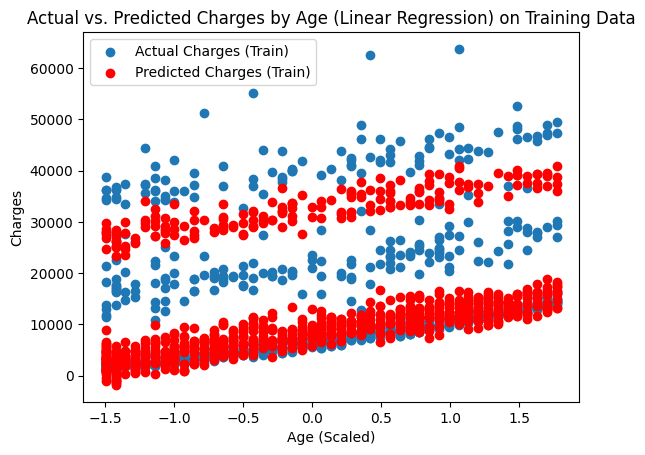

In [99]:
plt.scatter(X_train['age'], y_train, label='Actual Charges (Train)')
plt.scatter(X_train['age'], linear_reg_model.predict(X_train), color='red', label='Predicted Charges (Train)')
plt.xlabel("Age (Scaled)")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Charges by Age (Linear Regression) on Training Data")
plt.legend()
plt.show()

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_linear_reg)
mse_lr = mean_squared_error(y_test, y_pred_linear_reg)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_linear_reg)

print("Evaluasi Model Multiple Linear Regression:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

Evaluasi Model Multiple Linear Regression:
MAE: 3943.3176222087222
MSE: 32339047.243733287
RMSE: 5686.743113921472
R-squared: 0.7772757454435645


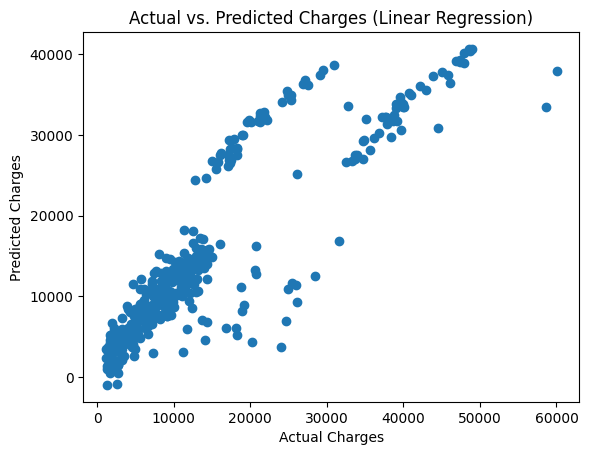

In [ ]:
# Visualisasi hasil prediksi Linear Regression vs data aktual
plt.scatter(y_test, y_pred_linear_reg)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.show()

**Analisis**

Dengan nilai R-squared = 0.777 pada data uji, model regresi linier berganda yang dilatih mampu menjelaskan sekitar 77,7% variasi dalam biaya medis personal. Ini menunjukkan bahwa variabel yang digunakan, seperti usia, jenis kelamin, BMI, jumlah anak, status perokok, dan wilayah, memiliki pengaruh yang signifikan terhadap biaya medis. Menurut analisis korelasi (heatmap) dan pengetahuan umum, atribut smoker memiliki pengaruh terbesar pada biaya, diikuti oleh "usia" dan "bmi". Selain itu, visualisasi charges yang sebenarnya dibandingkan dengan charges yang diprediksi menunjukkan bahwa model cenderung memprediksi dengan baik untuk sebagian besar data, meskipun ada beberapa prediksi yang agak menyimpang.